# Heart Disease Prediction

### Introduction

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease

## Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [3]:
data = pd.read_csv("heart.csv")
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


##This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


Attribute Information:

1.age
2.sex
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)
8.maximum heart rate achieved
9.exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
11.the slope of the peak exercise ST segment
12.number of major vessels (0-3) colored by flourosopy
13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Summerize The Dataset

In [4]:
print(data.shape)

print(data.isnull().sum())

(1025, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Interpritation: We can clearly say that there is no null values present in our dataset.

In [5]:
print(data["cp"].value_counts()) # cp = Chest pain

0    497
2    284
1    167
3     77
Name: cp, dtype: int64


we have following four different types of chest pain 

a = value 0 : typical angina

b= value 1 : atypical angina

c= value 2 : non-anginal pain

d= value 3 : asymptomatic


Interpritatin: maximum people have typical angina chest pain and asymptomatic chest pain has minimum.

In [6]:
data.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From above table we can conclude that we have total 1025 rows and 14 columns including target or outcome column.

In our dataset average age of person is 54. This data contens agegroup between 29 and 77.




## Visualize Data

<AxesSubplot:>

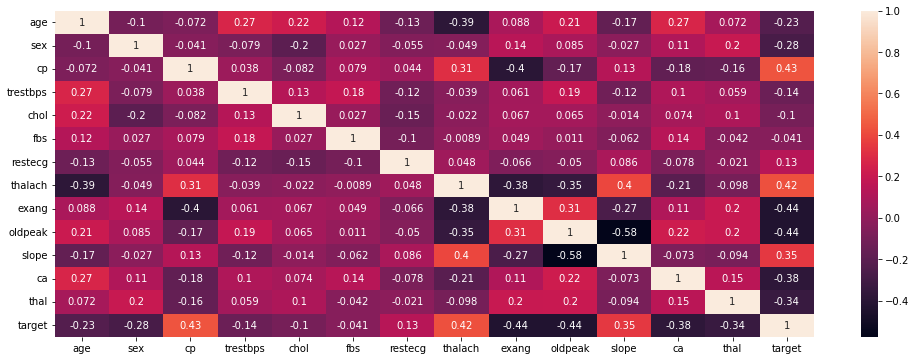

In [6]:
#To check correlation between all the veriabes in dataset

plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

##  How Many People Have Heart Disease And Lets Check Other Insites From Dataset

1    526
0    499
Name: target, dtype: int64


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

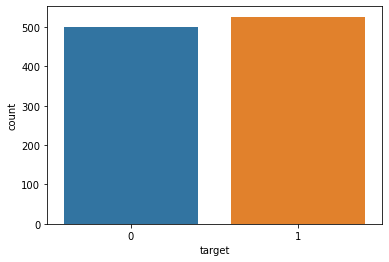

In [7]:
print(data["target"].value_counts())
sns.countplot(data['target'])

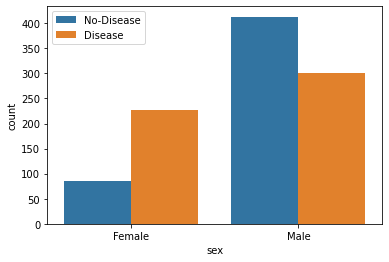

In [8]:
sns.countplot(x='sex',hue="target",data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels = ['No-Disease','Disease'])
plt.show()


From above graph we can conclude that we have less number of females as compare to male. 
we can find that more number of males are suffering from heart disease.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


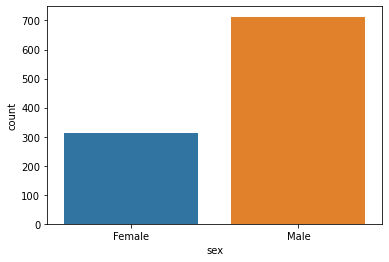

In [9]:
sns.countplot(data['sex'])
plt.xticks([0,1],['Female', 'Male'])
plt.show()

Our dataset contains maximum readings of male person. 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


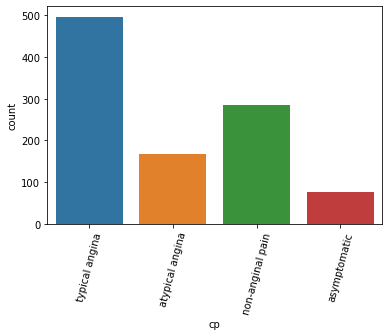

In [10]:
sns.countplot(data['cp'])
plt.xticks([0,1,2,3],["typical angina", "atypical angina", "non-anginal pain","asymptomatic"])
plt.xticks(rotation=75)
plt.show()

From above graph we can conclude that maximum persons affecte by typical angina chest pain and minimum by asyptomatic.

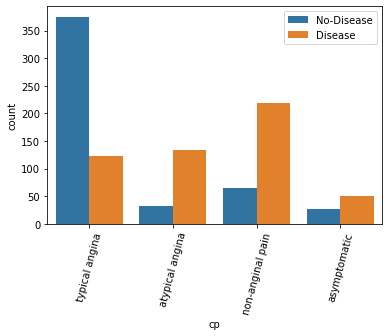

In [11]:
sns.countplot(x='cp',hue="target",data=data)
plt.xticks([0,1,2,3],["typical angina", "atypical angina", "non-anginal pain","asymptomatic"])
plt.xticks(rotation=75)
plt.legend(labels = ['No-Disease','Disease'])
plt.show()


We can see from above graph that non-anginal chest pain is more related to heart disease.

## *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [7]:
X = data.iloc[:, :-1].values
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [8]:
Y = data.iloc[:, -1].values
Y


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### *Splitting Dataset into Train & Test*

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(X_train)
print('\n')
print(y_train)

[[67.  1.  0. ...  1.  3.  2.]
 [50.  1.  0. ...  1.  0.  3.]
 [65.  1.  3. ...  1.  1.  2.]
 ...
 [65.  1.  3. ...  1.  1.  2.]
 [67.  1.  0. ...  1.  0.  2.]
 [60.  1.  2. ...  1.  0.  2.]]


[0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0
 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1
 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1
 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0

## *Feature Scaling*
### we scale our data to make all the features contribute equally to the result
Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
Transform - Transform method is transforming all the features using the respective mean and variance, 
We want our test data to be a completely new and a surprise set for our model

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 1.3756016   0.64371161 -0.92094523 ... -0.66196846  2.16167937
  -0.52198613]
 [-0.50461767  0.64371161 -0.92094523 ... -0.66196846 -0.73565005
   1.09448705]
 [ 1.15439933  0.64371161  1.98570929 ... -0.66196846  0.23012642
  -0.52198613]
 ...
 [ 1.15439933  0.64371161  1.98570929 ... -0.66196846  0.23012642
  -0.52198613]
 [ 1.3756016   0.64371161 -0.92094523 ... -0.66196846 -0.73565005
  -0.52198613]
 [ 0.60139366  0.64371161  1.01682445 ... -0.66196846 -0.73565005
  -0.52198613]]


## *Evaluating various ML Algorithm*

In [12]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = model1.predict(X_test)
print(np.column_stack((y_pred,y_test)))

[[1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]

In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 86.38132295719845%


Logisticregression model is performing quite good with accuracy 86%

In [19]:
# 6 ML Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [20]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.839764 (0.048585)
LDA: 0.824111 (0.045231)
KNN: 0.837201 (0.047073)
CART: 0.990892 (0.010150)
NB: 0.812423 (0.042741)
SVM: 0.906220 (0.039853)


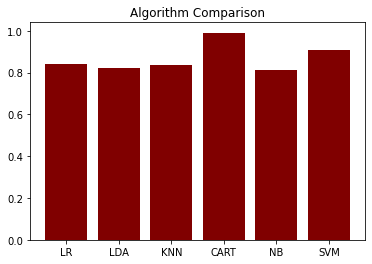

In [21]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


plt.bar(names, res, color ='maroon', width = 0.8)

plt.title('Algorithm Comparison')
plt.show()

We can clearly see that DecisionTreeClassifier (CART) has maximum accuracy as compare to other Algorithm

### *Finding best max_depth Value*

Text(0, 0.5, 'score')

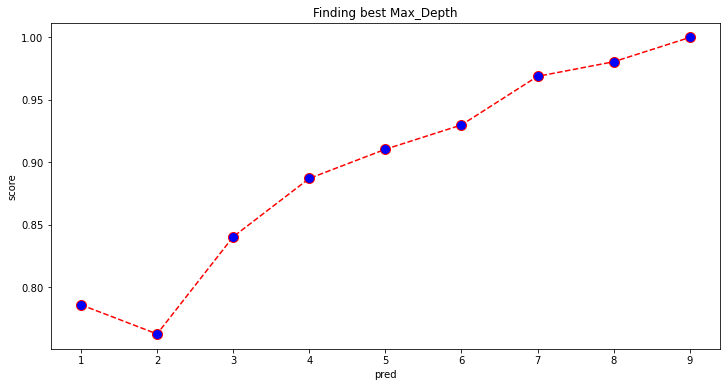

In [22]:
accuracy = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth = i, random_state = 0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test, pred)
    accuracy.append(score)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Finding best Max_Depth')
plt.xlabel('pred')
plt.ylabel('score')    

## *Training (for Decisiontree classifier)*

In [23]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7 , random_state = 0)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

## *Prediction*

In [24]:
y_pred = model2.predict(X_test)
print(np.column_stack((y_pred,y_test)))


[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 94.94163424124513%


In [26]:
print(model2.tree_.max_depth)

7


                       ######################### THANK YOU ###################################